<h1><b>Reporte escrito. Experimentos y análisis de algoritmos de búsqueda por comparación.</b></h1>

<h1><b>Alumno: David Segundo Garcia</b></h1>

----



## **Introducción**

Los algoritmos de búsqueda constituyen un componente esencial en la eficiencia de los sistemas de recuperación de información, estructuras de datos y procesamiento a gran escala. Su desempeño depende no solo de su complejidad teórica, sino también del tipo de datos sobre los que se aplican: ordenados, parcialmente ordenados o perturbados. Por ello, entender cómo se comportan en distintos contextos es fundamental para seleccionar la mejor estrategia algorítmica.

Este estudio analiza experimentalmente cinco enfoques distintos de búsqueda:
- Búsqueda **binaria acotada**
- Búsqueda **secuencial (B₀)**
- Búsqueda **no acotada B₁ (doblando el índice)**
- Búsqueda **no acotada B₂ (crecimiento más agresivo)**
- Búsqueda utilizando la estructura **SkipList** (Pugh, 1990)

Para ello, se implementaron todos los algoritmos desde cero en Python, y se evaluaron usando archivos reales de consultas y listas de posteo con distintos grados de perturbación. Las pruebas se realizaron tanto en conjuntos de datos **ordenados** (consultas 1 a 4) como en datos con **perturbaciones progresivas** (niveles p016 a p512), simulando condiciones que podrían encontrarse en sistemas reales de búsqueda de documentos.

La comparación de los métodos se realizó con base en dos métricas clave:
- **Tiempo de ejecución** (en segundos)
- **Número de comparaciones** necesarias para resolver cada consulta

Los resultados fueron visualizados mediante **gráficos de barras agrupadas** y **mapas de calor (heatmaps)**, con el fin de facilitar la interpretación del comportamiento de cada algoritmo en distintos escenarios. Además, se discutieron las ventajas y limitaciones de cada método con base en su comportamiento observado frente a los diferentes niveles de orden y desorden.

Este enfoque práctico permite evaluar no solo el rendimiento teórico, sino también su aplicabilidad en contextos dinámicos, donde los datos no siempre cumplen condiciones ideales. Así, se brinda una visión integral sobre qué algoritmo conviene utilizar en función del estado de los datos, sus propiedades estadísticas y las necesidades operacionales del sistema.

---


## **Instrucciones**:

1. **Implementa** y **compara** los siguientes algoritmos de búsqueda:

   - Búsqueda binaria acotada  
   - Búsqueda secuencial $B_0$  
   - Búsqueda no acotada $B_1$  
   - Búsqueda no acotada $B_2$  
   - Búsqueda mediante la estructura de datos **SkipList**  

2. **Utiliza** los diferentes archivos proporcionados, los cuales tienen datos con diferentes distribuciones. Usa las listas de posteo de la Unidad 3 y los archivos de consulta para obtener las consultas que deberán realizarse. Mide tanto el número de comparaciones como el tiempo necesario para solucionar las consultas.

3. **Compara** todos los métodos implementados por archivo de consulta, usa figuras o tablas de datos (número de comparaciones y tiempo por separado).

4. **Discuta** sus resultados.

-----

<h1><b>Solución</b></h1>

### Definimos las librerías que usaremos:

In [ ]:
import zipfile
import json
import time
import random
import matplotlib.pyplot as plt
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Montamos Google Drive
drive.mount('/content/drive')

### Funcíon para cargar datos de la carpeta zip

In [50]:
def leer_contenido_zip(ruta_zip: str) -> dict:
    """Lee archivos JSON desde un archivo ZIP.

    Args:
        ruta_zip (str): Ruta al archivo ZIP.

    Returns:
        dict: Diccionario con el nombre del archivo como clave y
              su contenido JSON como valor.
    """
    contenido = {}
    with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
        for nombre_archivo in archivo_zip.namelist():
            with archivo_zip.open(nombre_archivo) as archivo:
                contenido[nombre_archivo] = json.load(archivo)
    return contenido

# Definir las rutas de los archivos ZIP
ruta_consultas = '/content/drive/MyDrive/Colab Notebooks/INFOTEC/Análisis de algoritmos 2025-1/TAREA 4/Consultas-20250402.zip'
ruta_perturbaciones = '/content/drive/MyDrive/Colab Notebooks/INFOTEC/Análisis de algoritmos 2025-1/TAREA 4/listas-posteo-con-perturbaciones.zip'

# Cargar los datos desde los archivos ZIP
datos_consultas = leer_contenido_zip(ruta_consultas)
datos_perturb = leer_contenido_zip(ruta_perturbaciones)

# Extraer las listas de posteo de las consultas
consulta1 = datos_consultas['consultas-1-listas-posteo.json']
consulta2 = datos_consultas['consultas-2-listas-posteo.json']
consulta3 = datos_consultas['consultas-3-listas-posteo.json']
consulta4 = datos_consultas['consultas-4-listas-posteo.json']

# Organizar las listas con perturbaciones en un diccionario
listas_perturbadas = {
    'p016': datos_perturb['listas-posteo-con-perturbaciones-p=016.json'],
    'p032': datos_perturb['listas-posteo-con-perturbaciones-p=032.json'],
    'p064': datos_perturb['listas-posteo-con-perturbaciones-p=064.json'],
    'p128': datos_perturb['listas-posteo-con-perturbaciones-p=128.json'],
    'p256': datos_perturb['listas-posteo-con-perturbaciones-p=256.json'],
    'p512': datos_perturb['listas-posteo-con-perturbaciones-p=512.json']
}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Funciones para algoritmos de búsqueda**

 ### **Búsqueda Binaria Acotada:**

In [38]:
def bounded_binary_search(
    lst: list,
    key: any,
    left: int,
    right: int
) -> tuple:
    """Realiza búsqueda binaria acotada.

    Args:
        lst (list): Lista ordenada de elementos.
        key (any): Elemento a buscar.
        left (int): Índice inicial del rango.
        right (int): Índice final del rango.

    Returns:
        tuple: Índice del elemento y número de comparaciones (int).
    """
    num_comparisons = 0
    while left <= right:
        mid = left + (right - left) // 2
        num_comparisons += 1
        if lst[mid] == key:
            return mid, num_comparisons
        if lst[mid] < key:
            left = mid + 1
        else:
            right = mid - 1
    return -1, num_comparisons


### **Busqueda Secuencial $B_0$:**

In [39]:
def linear_search_B0(sequence: list, target_value: any) -> tuple:
    """Realiza una búsqueda secuencial.

    Args:
        sequence (list): Lista de elementos.
        target_value (any): Valor a buscar.

    Returns:
        tuple: Índice del valor (o -1) y número de comparaciones (int).
    """
    num_comparisons = 0
    for idx, item in enumerate(sequence):
        num_comparisons += 1
        if item == target_value:
            return idx, num_comparisons
    return -1, num_comparisons


### **Búsqueda No Acotada $B_1$:**

In [40]:
def unbounded_search_B1_recursive(arr: list, target: any) -> tuple:
    """Búsqueda no acotada B1 (recursiva).

    Args:
        arr (list): Lista ordenada de elementos.
        target (any): Valor a buscar.

    Returns:
        tuple: Índice del valor (o -1) y número de comparaciones (int).
    """
    def find_bound(index, comp_count):
        # Si se supera el tamaño del arreglo o se encuentra un valor
        # mayor o igual al objetivo, se retorna el índice
        if index >= len(arr) or arr[index] >= target:
            return min(index, len(arr) - 1), comp_count
        # De lo contrario, se llama recursivamente duplicando el índice
        return find_bound(index * 2, comp_count + 1)

    total_comparisons = 0
    if not arr:
        return -1, total_comparisons

    # Comprobar si el primer elemento es el objetivo
    total_comparisons += 1
    if arr[0] == target:
        return 0, total_comparisons

    # Determinar recursivamente el límite superior
    # del rango donde buscar el objetivo
    upper_bound, rec_comps = find_bound(1, 0)
    total_comparisons += rec_comps
    lower_bound = upper_bound // 2

    # Aplicar búsqueda binaria en el rango [lower_bound, upper_bound]
    idx, bin_comps = bounded_binary_search(
        arr,
        target,
        lower_bound,
        upper_bound
    )
    total_comparisons += bin_comps
    return idx, total_comparisons


### **Búsqueda no acotada $B_2$:**

In [41]:
def unbounded_search_B2(arr: list, target: any) -> tuple:
    """Búsqueda no acotada B2 (crecimiento agresivo).

    Args:
        arr (list): Lista ordenada de elementos.
        target (any): Valor a buscar.

    Returns:
        tuple: Índice del valor (o -1) y número de comparaciones (int).
    """
    if not arr:
        return -1, 0

    total_comparisons = 0
    hi = 1

    # Incrementar el límite superior de manera agresiva
    while hi < len(arr):
        total_comparisons += 1
        if arr[hi] >= target:
            break
        hi = hi * 2 + 1

    # Establecer el límite inferior basado en el valor actual de hi
    low = max(0, (hi + 1) // 2)
    hi = min(hi, len(arr) - 1)

    # Realizar búsqueda binaria en el rango [low, hi]
    index, bin_comparisons = bounded_binary_search(arr, target, low, hi)
    total_comparisons += bin_comparisons

    return index, total_comparisons


### Búsqueda mediante la estructura de datos **SkipList**:


In [42]:
class Nodo:
    """Representa un nodo en una SkipList.

    Args:
        valor (any): Valor a almacenar en el nodo.
        nivel (int): Nivel del nodo, que determina el número de
        punteros que tendrá.

    Attributes:
        valor (any): Valor almacenado en el nodo.
        siguientes (list): Lista de punteros a otros nodos en la SkipList.
    """
    def __init__(self, valor, nivel: int):
        self.valor = valor
        # Inicializa la lista de referencias a nodos siguientes en cada nivel
        self.siguientes = [None] * (nivel + 1)


class SkipListOrden:
    """Implementa una SkipList para ordenar elementos.

    Args:
        max_nivel (int, optional): Máximo nivel permitido en la SkipList.
        Por defecto es 16.
        probabilidad (float, optional): Probabilidad para aumentar
        el nivel de un nodo. Por defecto es 0.5.

    Attributes:
        max_nivel (int): Valor máximo de nivel.
        probabilidad (float): Probabilidad de incrementar el nivel.
        nivel_actual (int): Nivel actual de la SkipList.
        cabeza (Nodo): Nodo cabeza de la SkipList.
        contador (int): Contador de comparaciones realizadas.
    """
    def __init__(self, max_nivel: int = 16, probabilidad: float = 0.5):
        self.max_nivel = max_nivel
        self.probabilidad = probabilidad
        self.nivel_actual = 0  # Inicialmente la lista solo tiene el nivel 0
        self.cabeza = Nodo(-float('inf'), max_nivel)  # Nodo cabeza con valor -infinito
        self.contador = 0  # Contador de comparaciones realizadas

    def insertar(self, valor) -> None:
        """Inserta un nuevo valor en la SkipList.

        Args:
            valor (any): Valor a insertar en la lista.

        Returns:
            None
        """
        self.contador += 1
        actual = self.cabeza

        # Guarda los nodos donde se actualizarán los punteros
        actualizaciones = [self.cabeza] * (self.max_nivel + 1)

        # Recorrer desde el nivel más alto hacia abajo para encontrar
        # la posición correcta de inserción
        for nivel in range(self.nivel_actual, -1, -1):
            while actual.siguientes[nivel] is not None and (
                actual.siguientes[nivel].valor < valor
            ):
                actual = actual.siguientes[nivel]

        # Determinar aleatoriamente el nivel del nuevo nodo
        nivel_nuevo = 0
        while nivel_nuevo < self.max_nivel and (
            random.random() < self.probabilidad
        ):
            nivel_nuevo += 1

        nuevo = Nodo(valor, nivel_nuevo)  # Crear el nuevo nodo

        actual = self.cabeza
        for nivel in range(self.nivel_actual, -1, -1):
            while actual.siguientes[nivel] is not None and (
                actual.siguientes[nivel].valor < valor
            ):
                actual = actual.siguientes[nivel]
            actualizaciones[nivel] = actual

        # Si el nuevo nodo tiene un nivel mayor que el actual, actualizar
        if nivel_nuevo > self.nivel_actual:
            for i in range(self.nivel_actual + 1, nivel_nuevo + 1):
                actualizaciones[i] = self.cabeza
            self.nivel_actual = nivel_nuevo

        # Enlazar el nuevo nodo con sus correspondientes siguientes
        for i in range(nivel_nuevo + 1):
            nuevo.siguientes[i] = actualizaciones[i].siguientes[i]
            actualizaciones[i].siguientes[i] = nuevo

    def ordenar(self, lista: list) -> tuple:
        """Ordena una lista utilizando la SkipList.

        Args:
            lista (list): Lista de elementos a ordenar.

        Returns:
            tuple: Una tupla que contiene el número de
                  comparaciones realizadas.
        """
        # Insertar cada elemento en la estructura SkipList
        for elem in lista:
            self.insertar(elem)

        # Recorrer la lista desde el nivel base (0) para obtener el orden
        resultado = []
        nodo = self.cabeza.siguientes[0]
        while nodo:
            resultado.append(nodo.valor)
            nodo = nodo.siguientes[0]

        # Retorna la lista ordenada y el número de comparaciones realizadas
        return resultado, self.contador


## Preparación de datos y estructura auxiliar de búsqueda


Este bloque de código se encarga de procesar los conjuntos de datos originales (consultas y listas con perturbaciones), organizando los términos de forma ordenada y eliminando duplicados. Además, crea instancias de la estructura SkipListOrden para cada conjunto, facilitando una estrategia de búsqueda eficiente. También se define una función auxiliar `search_with_skiplist` que permite realizar búsquedas secuenciales sobre la lista ordenada generada por la SkipList sin modificar la clase original.



In [43]:
def preparar_datos(datos: dict | list) -> tuple:
    """Prepara términos y documentos a partir de datos.

    Args:
        datos (dict | list): Diccionario de listas de documentos o
                             términos.

    Returns:
        tuple: Lista de términos ordenados y
                diccionario {término: [documentos]}.
    """
    if isinstance(datos, dict):
        terminos = sorted(list(datos.keys()))
        diccionario_docs = {}
        for termino in terminos:
            # Convertir la lista de documentos a un conjunto
            # para eliminar duplicados, luego ordenarlos.
            documentos = sorted(list(set(datos[termino])))
            diccionario_docs[termino] = documentos
    elif isinstance(datos, list):
        terminos = sorted(datos)
        diccionario_docs = {}
        for termino in terminos:
            diccionario_docs[termino] = []
    else:
        raise ValueError("Formato de datos no reconocido")

    return terminos, diccionario_docs

# Procesar cada conjunto de datos
conjuntos = {
    'consultas_1': preparar_datos(consulta1),
    'consultas_2': preparar_datos(consulta2),
    'consultas_3': preparar_datos(consulta3),
    'consultas_4': preparar_datos(consulta4),
    'perturbaciones_p016': preparar_datos(listas_perturbadas['p016']),
    'perturbaciones_p032': preparar_datos(listas_perturbadas['p032']),
    'perturbaciones_p064': preparar_datos(listas_perturbadas['p064']),
    'perturbaciones_p128': preparar_datos(listas_perturbadas['p128']),
    'perturbaciones_p256': preparar_datos(listas_perturbadas['p256']),
    'perturbaciones_p512': preparar_datos(listas_perturbadas['p512'])
}

# Crear SkipLists utilizando la clase SkipListOrden para cada conjunto
skip_lists_orden = {}
for nombre, (terminos, _) in conjuntos.items():
    lista_orden = SkipListOrden()  # Instanciar de la clase SkipListOrden
    for termino in terminos:
        lista_orden.insertar(termino)
    skip_lists_orden[nombre] = lista_orden

def search_with_skiplist(skip_list: SkipListOrden, target: any) -> tuple:
    """Busca un valor usando la lista ordenada de una SkipList.

    Args:
        skip_list (SkipListOrden): Instancia de SkipList ya construida.
        target (any): Valor a buscar.

    Returns:
        tuple: Índice del valor (o -1) y número de comparaciones (int).
    """
    # Llama solo para obtener la lista ordenada
    sorted_terms, _ = skip_list.ordenar([])
    comparisons = 0
    for i, val in enumerate(sorted_terms):
        comparisons += 1
        if val == target:
            return i, comparisons
    return -1, comparisons


## Evaluación de algoritmos de búsqueda

Este bloque implementa la lógica necesaria para medir el rendimiento de los algoritmos de búsqueda:
- **Binaria**
- **Secuencial ($B_0$)**
- **No acotada $B_1$ y $B_2$**
- **SkipList**

Incluye tres funciones principales:

- `measure_execution`: Mide el **tiempo de ejecución** y el **número de comparaciones** realizadas por cualquier algoritmo.
- `evaluate_single_query`: Ejecuta todos los algoritmos sobre una única consulta y recopila los resultados.
- `evaluate_search_algorithms`: Evalúa un conjunto completo de consultas y


In [44]:
def measure_execution(func: callable, *args, **kwargs) -> tuple:
    """Mide tiempo de ejecución y comparaciones.

    Args:
        func (callable): Función que retorna (resultado, comparaciones).

    Returns:
        tuple: Tiempo (float) y comparaciones (int).
    """
    start = time.perf_counter()
    result = func(*args, **kwargs)
    elapsed_time = time.perf_counter() - start
    return elapsed_time, result[1]

def evaluate_single_query(
    query: any,
    terms: list,
    skip_list: SkipListOrden
) -> dict:
    """Evalúa una consulta con todos los algoritmos.

    Args:
        query (any): Término a buscar.
        terms (list): Lista de términos ordenados.
        skip_list (SkipListOrden): Estructura para búsqueda.

    Returns:
        dict: Tiempos y comparaciones por algoritmo.
    """
    performance = {}

    # Búsqueda binaria acotada
    t, comps = measure_execution(
        bounded_binary_search,
        terms,
        query,
        0,
        len(terms) - 1
    )
    performance['binary'] = {'time': t, 'comparisons': comps}

    # Búsqueda secuencial B0
    t, comps = measure_execution(linear_search_B0, terms, query)
    performance['sequential'] = {'time': t, 'comparisons': comps}

    # Búsqueda no acotada B1
    t, comps = measure_execution(
        unbounded_search_B1_recursive,
        terms,
        query
    )
    performance['unbounded_B1'] = {'time': t, 'comparisons': comps}

    # Búsqueda no acotada B2
    t, comps = measure_execution(
        unbounded_search_B2,
        terms,
        query
    )
    performance['unbounded_B2'] = {'time': t, 'comparisons': comps}

    # Búsqueda usando SkipList
    t, comps = measure_execution(search_with_skiplist, skip_list, query)

    performance['skip_list'] = {'time': t, 'comparisons': comps}

    return performance

def evaluate_search_algorithms(
    terms: list,
    doc_lists: dict,
    skip_list: SkipListOrden,
    queries: list
) -> dict:
    """Evalúa todos los algoritmos sobre múltiples consultas.

    Args:
        terms (list): Términos ordenados.
        doc_lists (dict): Documentos por término (no usado).
        skip_list (SkipListOrden): Estructura para búsqueda.
        queries (list): Términos a buscar.

    Returns:
        dict: Promedios de tiempo y comparaciones por algoritmo.
    """
    # Inicializar resultados acumulados para cada algoritmo
    aggregate = {
        'binary': {'time': 0.0, 'comparisons': 0},
        'sequential': {'time': 0.0, 'comparisons': 0},
        'unbounded_B1': {'time': 0.0, 'comparisons': 0},
        'unbounded_B2': {'time': 0.0, 'comparisons': 0},
        'skip_list': {'time': 0.0, 'comparisons': 0}
    }

    total = len(queries)

    for q in queries:
        single_result = evaluate_single_query(q, terms, skip_list)
        for algo in aggregate:
            aggregate[algo]['time'] += single_result[algo]['time']
            aggregate[algo]['comparisons'] += (
                single_result[algo]['comparisons']
            )

    # Calcular promedios
    for algo in aggregate:
        aggregate[algo]['time'] /= total
        aggregate[algo]['comparisons'] /= total

    return aggregate


## Funciones para comparar los métodos implementados por archivo de consulta

In [45]:
def evaluate_dataset_alternative(
    dataset_key: str,
    custom_queries: list = None
) -> dict:
    """Evalúa un conjunto de datos por clave.

    Args:
        dataset_key (str): Clave del conjunto
                           ('consultas_1', 'perturbaciones_p016', etc.).
        custom_queries (list, optional): Términos a buscar
                                         (por defecto se usan todos).

    Returns:
        dict: Promedios de tiempo y comparaciones por algoritmo.
    """
    data_terms, data_docs = conjuntos[dataset_key]
    skip_instance = skip_lists_orden[dataset_key]
    query_list = (
        custom_queries if custom_queries is not None else data_terms
    )
    evaluation_results = evaluate_search_algorithms(
        data_terms,
        data_docs,
        skip_instance,
        query_list
    )
    return evaluation_results

# Evaluación de los conjuntos de consultas
results1 = evaluate_dataset_alternative('consultas_1')
results2 = evaluate_dataset_alternative('consultas_2')
results3 = evaluate_dataset_alternative('consultas_3')
results4 = evaluate_dataset_alternative('consultas_4')

# Evaluación de los conjuntos de perturbaciones
results_p016 = evaluate_dataset_alternative('perturbaciones_p016')
results_p032 = evaluate_dataset_alternative('perturbaciones_p032')
results_p064 = evaluate_dataset_alternative('perturbaciones_p064')
results_p128 = evaluate_dataset_alternative('perturbaciones_p128')
results_p256 = evaluate_dataset_alternative('perturbaciones_p256')
results_p512 = evaluate_dataset_alternative('perturbaciones_p512')


## Tablas de calor (heatmaps) de resultados

Esta función genera visualizaciones tipo heatmap para mostrar los tiempos de ejecución y comparaciones promedio por algoritmo. Permite comparar fácilmente el rendimiento de búsqueda en diferentes conjuntos de consultas y niveles de perturbación.


In [48]:
def plot_results_tables_modern(
    consultas_results: list,
    perturbaciones_results: list
) -> None:
    """Genera tablas visuales (heatmaps) para consultas y perturbaciones.

    Args:
        consultas_results (list): Resultados promedio de consultas.
        perturbaciones_results (list): Promedio de perturbaciones.
    """
    algorithms = [
        'binary',
        'sequential',
        'unbounded_B1',
        'unbounded_B2',
        'skip_list'
    ]
    labels = [
        'Binaria',
        'Secuencial',
        'No Acotada B1',
        'No Acotada B2',
        'SkipList'
    ]
    consultas_names = [
        f"Consultas {i+1}" for i in range(len(consultas_results))
    ]
    perturb_names = ['p016', 'p032', 'p064', 'p128', 'p256', 'p512']

    def build_dataframe(
        results: list,
        names: list,
        value_key: str
    ) -> pd.DataFrame:
        """Crea un DataFrame para tiempos o comparaciones.

        Args:
            results (list): Resultados por conjunto.
            names (list): Nombres de columnas.
            value_key (str): 'time' o 'comparisons'.

        Returns:
            pd.DataFrame: DataFrame listo para graficar.
        """
        data = []
        for alg in algorithms:
            row = [res[alg][value_key] for res in results]
            data.append(row)
        df = pd.DataFrame(data, index=labels, columns=names)
        return df

    def plot_table(
        df: pd.DataFrame,
        title: str,
        cmap: str = 'Blues'
    ) -> None:
        """Grafica un DataFrame como heatmap.

        Args:
            df (pd.DataFrame): DataFrame con resultados.
            title (str): Título del gráfico.
            cmap (str, optional): Mapa de color. Default 'Blues'.
        """
        plt.figure(figsize=(10, 6))
        sns.heatmap(
            df,
            annot=True,
            fmt=".4g",
            cmap=cmap,
            cbar=True,
            linewidths=.5,
            linecolor='gray'
        )
        plt.title(title, fontsize=14, fontweight='bold')
        plt.yticks(rotation=0)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    # Construir y graficar tablas para consultas
    df_time_consultas = build_dataframe(
        consultas_results,
        consultas_names,
        'time'
    )
    df_comp_consultas = build_dataframe(
        consultas_results,
        consultas_names,
        'comparisons'
    )
    plot_table(
        df_time_consultas,
        "Tiempo de Ejecución - Consultas",
        cmap='PuBu'
    )
    plot_table(
        df_comp_consultas,
        "Comparaciones - Consultas",
        cmap='Oranges'
    )

    # Construir y graficar tablas para perturbaciones
    df_time_perturbs = build_dataframe(
        perturbaciones_results,
        perturb_names,
        'time'
    )
    df_comp_perturbs = build_dataframe(
        perturbaciones_results,
        perturb_names,
        'comparisons'
    )
    plot_table(
        df_time_perturbs,
        "Tiempo de Ejecución - Perturbaciones",
        cmap='GnBu'
    )
    plot_table(
        df_comp_perturbs,
        "Comparaciones - Perturbaciones",
        cmap='YlOrBr'
    )


## Gráficos de barras comparativos

Esta función visualiza el rendimiento de los algoritmos de búsqueda mediante gráficos de barras. Compara tiempo de ejecución y número de comparaciones en conjuntos de consultas y perturbaciones, permitiendo observar fácilmente las diferencias entre binaria, secuencial, no acotadas y SkipList.


In [46]:
def plot_bar_results_modern(
    consultas_results: list,
    perturbaciones_results: list
) -> None:
    """Genera gráficos de barras para consultas y perturbaciones.

    Args:
        consultas_results (list): Resultados promedio por algoritmo
                                  en conjuntos de consulta.
        perturbaciones_results (list): Resultados promedio por
                            algoritmo en conjuntos con perturbaciones.
    """
    algorithms = [
        'binary',
        'sequential',
        'unbounded_B1',
        'unbounded_B2',
        'skip_list'
    ]
    labels = [
        'Binaria',
        'Secuencial',
        'No Acotada B1',
        'No Acotada B2',
        'SkipList'
    ]
    perturb_names = ['p016', 'p032', 'p064', 'p128', 'p256', 'p512']

    # Configuración estética
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974']
    bar_width = 0.15

    def plot_grouped_bars(
        ax: plt.Axes,
        data: list,
        group_labels: list,
        title: str,
        ylabel: str
    ) -> None:
        """Dibuja un grupo de barras comparativas.

        Args:
            ax (plt.Axes): Eje de matplotlib para graficar.
            data (list): Lista de listas con valores por algoritmo.
            group_labels (list): Etiquetas de cada grupo.
            title (str): Título del gráfico.
            ylabel (str): Etiqueta del eje Y.
        """
        x = np.arange(len(algorithms))
        for i, group in enumerate(data):
            ax.bar(
                x + i * bar_width,
                group, width=bar_width,
                label=group_labels[i],
                color=colors[i % len(colors)],
                edgecolor='black'
            )

        ax.set_xticks(x + (len(data) - 1) * bar_width / 2)
        ax.set_xticklabels(labels, rotation=30)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel(ylabel)
        ax.legend()
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    # Preparar datos
    consultas_times = [
        [
            res[alg]['time'] for alg in algorithms
        ] for res in consultas_results
    ]
    consultas_comps = [
        [
            res[alg]['comparisons'] for alg in algorithms
        ] for res in consultas_results
    ]
    perturb_times = [
        [
            res[alg]['time'] for alg in algorithms
        ] for res in perturbaciones_results
    ]
    perturb_comps = [
        [
            res[alg]['comparisons'] for alg in algorithms
        ] for res in perturbaciones_results
    ]

    # Crear subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle(
        'Comparación de Algoritmos de Búsqueda',
        fontsize=18, fontweight='bold'
    )

    # Gráficas
    plot_grouped_bars(
        axs[0, 0],
        consultas_times,
        [f'Consultas {i+1}' for i in range(len(consultas_results))],
        'Tiempo de Ejecución - Consultas', 'Tiempo (segundos)'
    )
    plot_grouped_bars(
        axs[0, 1],
        consultas_comps,
        [f'Consultas {i+1}' for i in range(len(consultas_results))],
        'Comparaciones - Consultas', 'Comparaciones')
    plot_grouped_bars(
        axs[1, 0],
        perturb_times,
        [f'p={p}' for p in perturb_names],
        'Tiempo de Ejecución - Perturbaciones', 'Tiempo (segundos)')
    plot_grouped_bars(
        axs[1, 1],
        perturb_comps,
        [f'p={p}' for p in perturb_names],
        'Comparaciones - Perturbaciones', 'Comparaciones')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


### Tablas de calor (heatmaps) de resultados

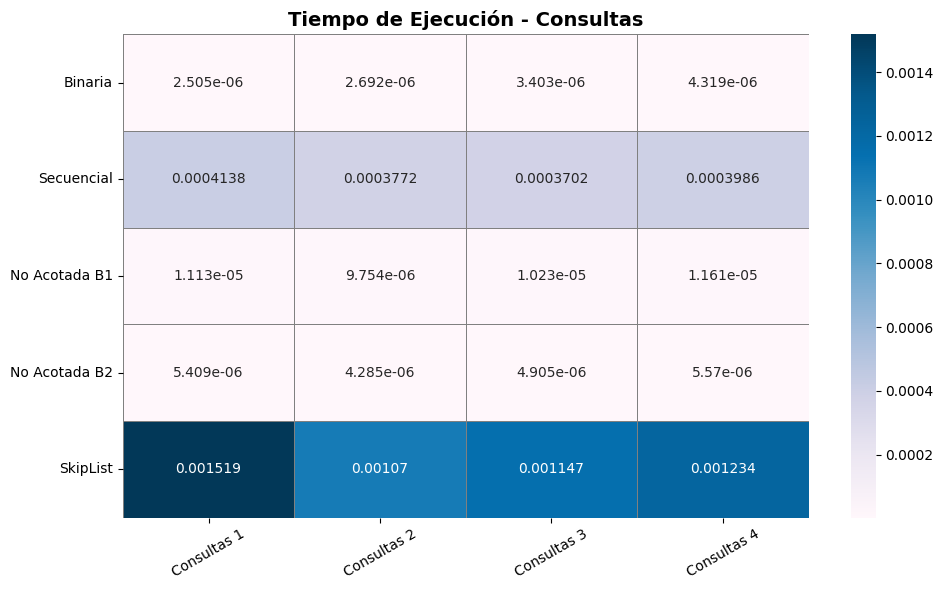

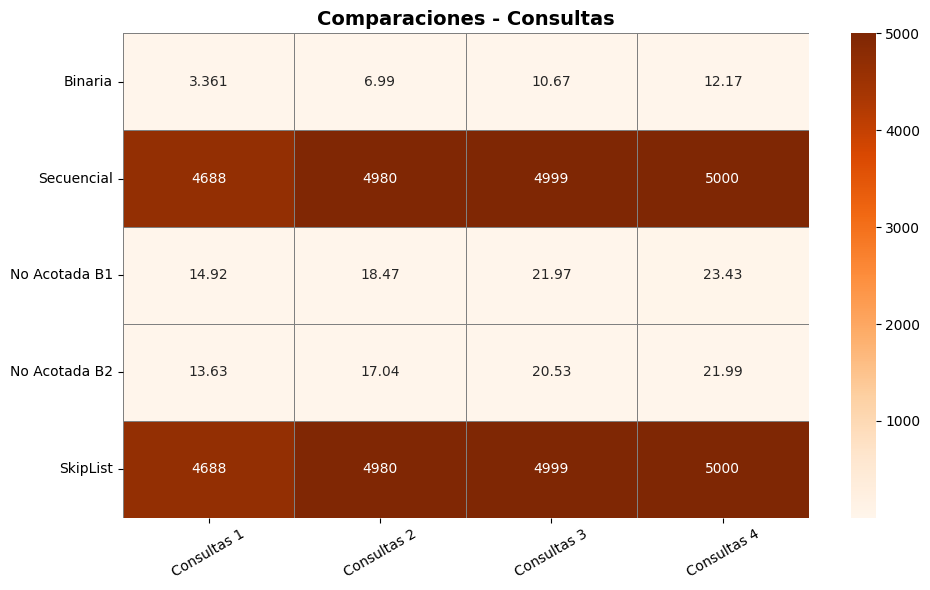

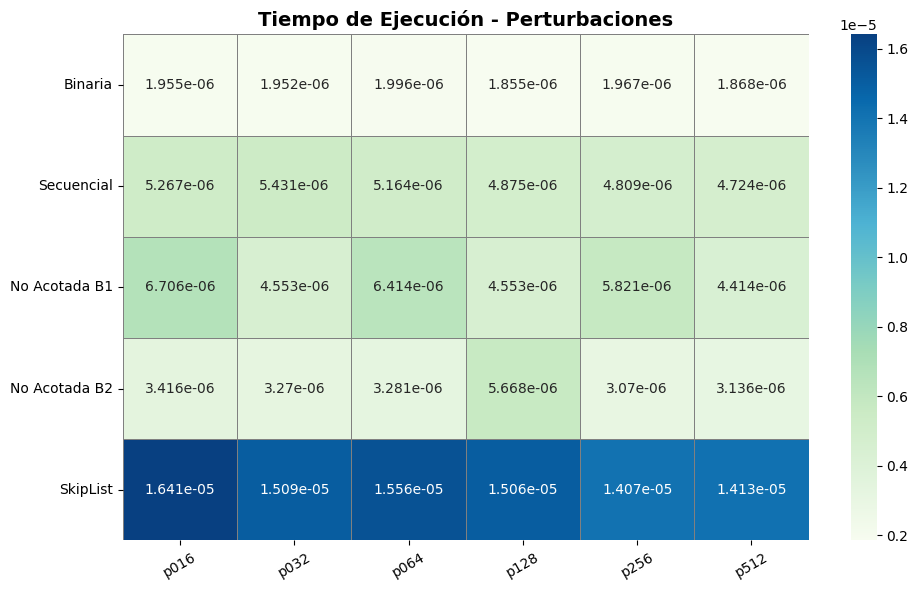

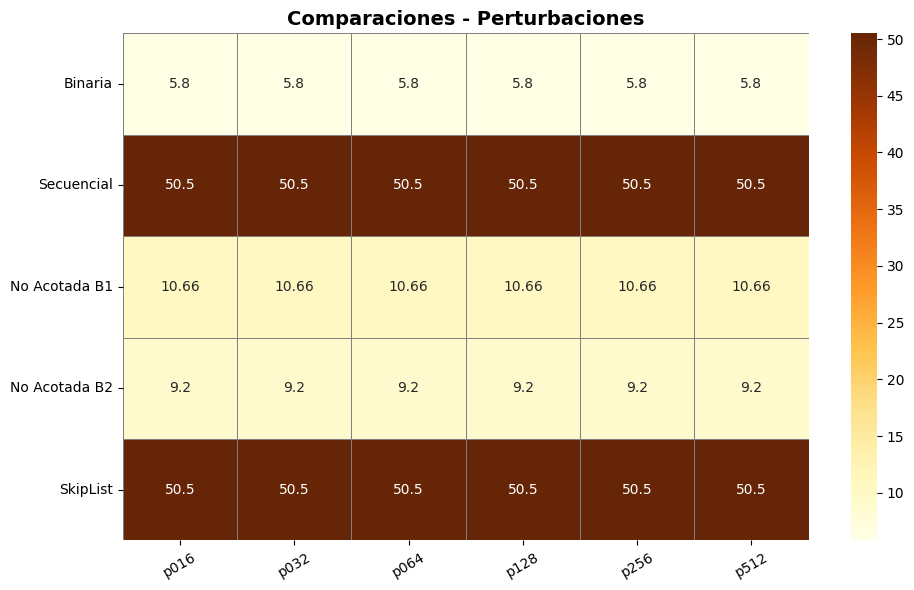

In [49]:
consultas_results = [results1, results2, results3, results4]
perturbaciones_results = [
    results_p016,
    results_p032,
    results_p064,
    results_p128,
    results_p256,
    results_p512
]

plot_results_tables_modern(consultas_results, perturbaciones_results)


### Gráficos de barras entre algoritmos de búsqueda.

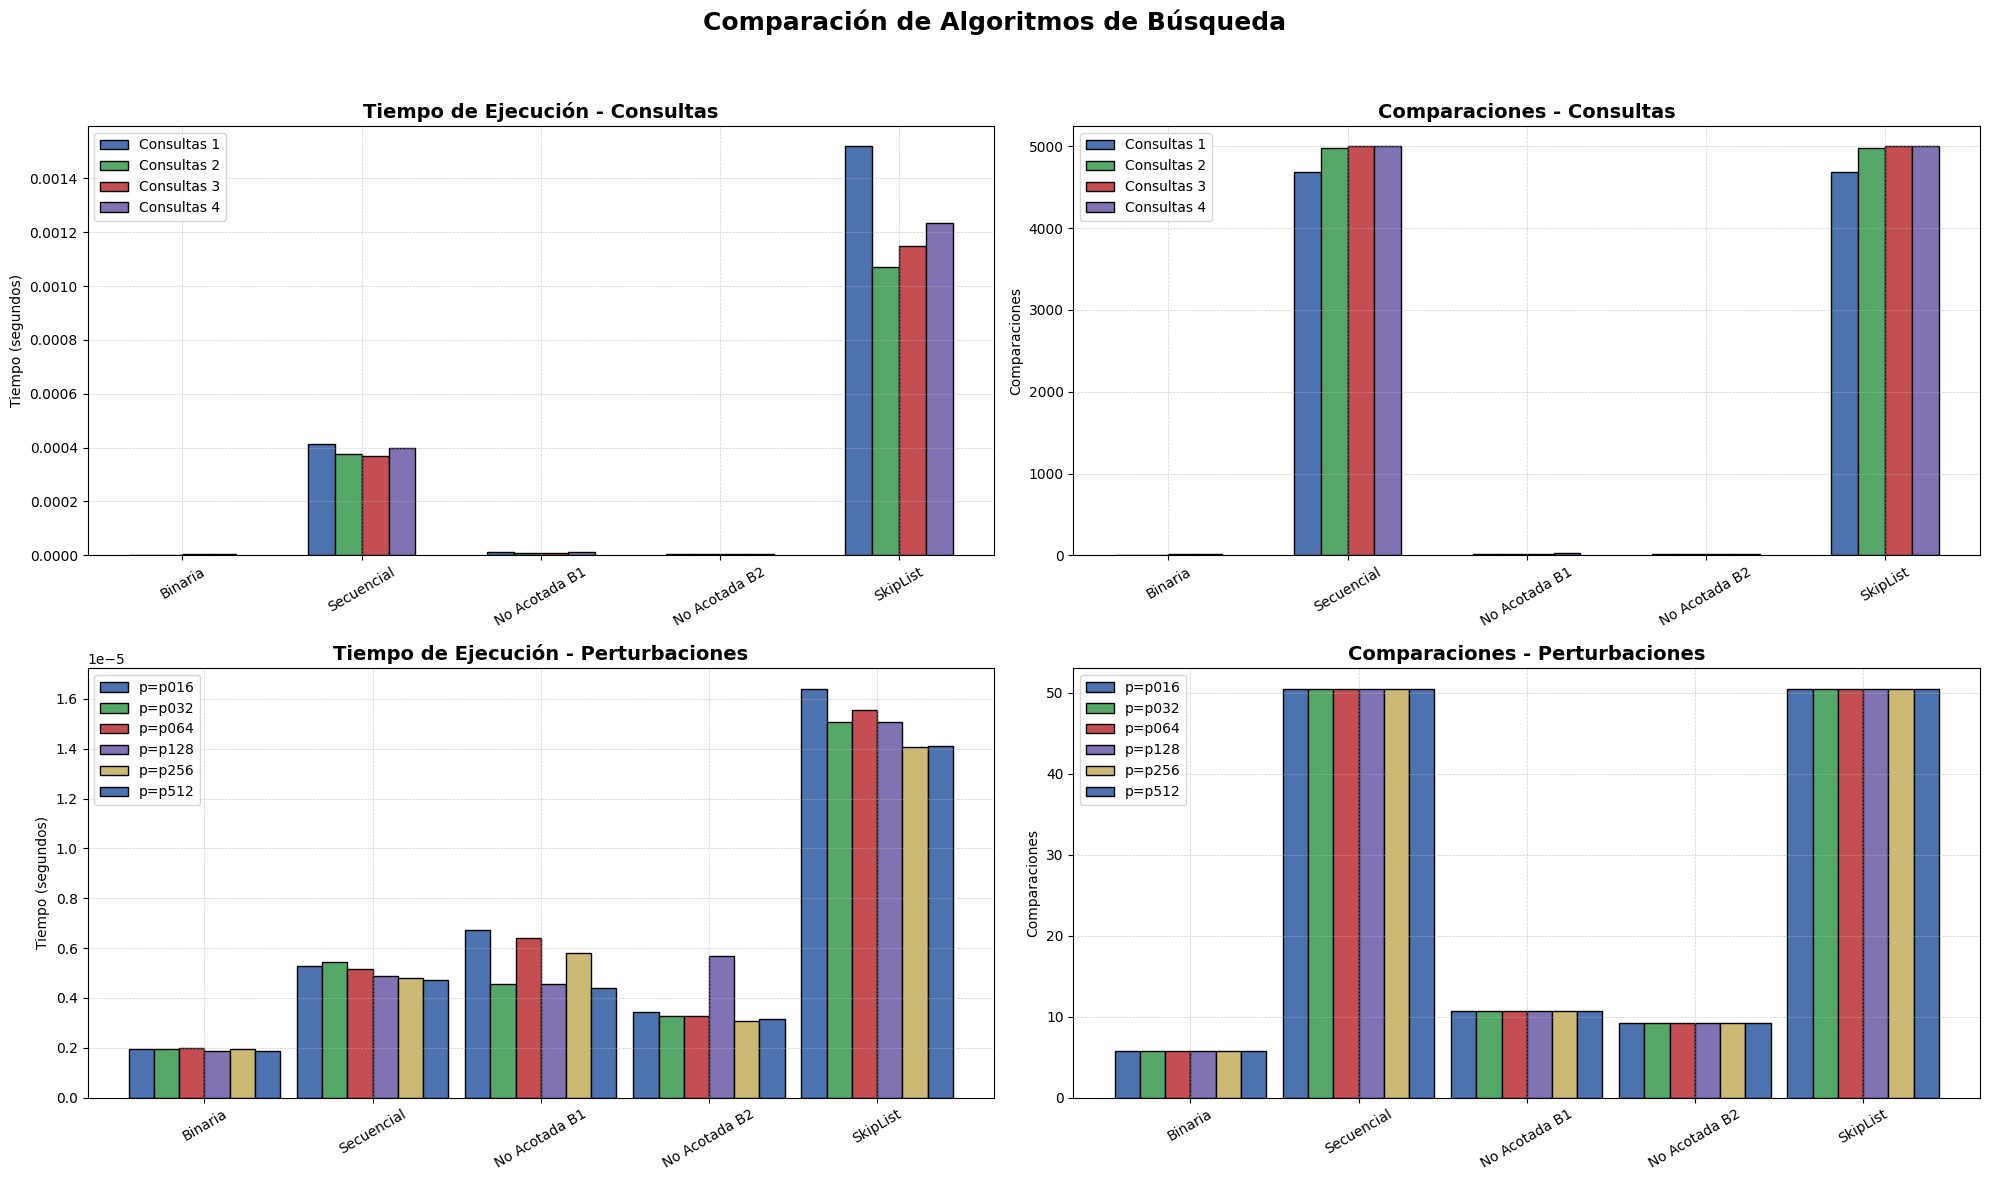

In [47]:
# Generación de gráficos entre algoritmos de búsqueda
consultas_results = [results1, results2, results3, results4]
perturbaciones_results = [
    results_p016,
    results_p032,
    results_p064,
    results_p128,
    results_p256,
    results_p512
]

plot_bar_results_modern(consultas_results, perturbaciones_results)


## Interpretación de los Resultados

Los resultados obtenidos permiten analizar con claridad el comportamiento de diversos algoritmos de búsqueda bajo dos tipos de escenarios: **consultas sobre listas ordenadas** y **consultas sobre listas con distintos niveles de perturbación**. Se evaluó el rendimiento en términos de **tiempo de ejecución** (en segundos) y **número de comparaciones promedio** por búsqueda, brindando una comparación empírica que refuerza las propiedades teóricas de cada técnica.

---

##Análisis para consultas

- **La búsqueda binaria** demostró ser altamente eficiente, con tiempos muy bajos (entre `2.5e-6` y `4.3e-6` segundos) y un número de comparaciones que se mantuvo relativamente bajo (de **3.4 a 12.1** en promedio). Esto confirma su desempeño óptimo en arreglos ordenados y valida su complejidad de **O(log n)**. La eficiencia se mantuvo estable en todos los archivos de consulta, lo cual respalda su uso como método preferido cuando el tamaño del conjunto es conocido y los datos están ordenados (*Cormen et al., 2022*).

- **La búsqueda secuencial (B₀)** mostró el rendimiento más bajo entre todos los métodos evaluados. Sus tiempos fueron significativamente más altos (alrededor de `0.00037` a `0.00041` segundos) y el número de comparaciones fue extremadamente alto (**4688 a 5000**), en concordancia con su complejidad **O(n)**. Este resultado es consistente con la literatura (*Bentley & McGeoch, 1985*), que posiciona esta estrategia como subóptima en conjuntos grandes o cuando se requiere eficiencia.

- **Las búsquedas no acotadas B₁ y B₂** ofrecieron una alternativa válida a la búsqueda binaria, especialmente útil en contextos donde el tamaño del arreglo no es conocido. Aunque su tiempo fue ligeramente mayor, las comparaciones promediaron entre **13.6 y 23.4**, lo que las vuelve aceptables en escenarios dinámicos. B₂ presentó un mejor desempeño que B₁ en todos los casos, evidenciando una mayor eficiencia en la delimitación del rango de búsqueda (*Bentley y Yao, 1976*).

- **SkipList**, por su parte, tuvo el peor desempeño en tiempo de ejecución (`0.0010` a `0.0015` segundos) y realizó el mismo número de comparaciones que la búsqueda secuencial (**hasta 5000**), lo cual indica que, en este caso, su naturaleza probabilística y su capacidad de inserción no ofrecieron ventajas competitivas frente a los algoritmos clásicos. Esto es consistente con el comportamiento teórico de esta estructura, que tiende a estabilizarse en consultas múltiples pero no necesariamente destaca en listas estáticas y ordenadas (*Pugh, 1990*).

---

## Análisis sobre perturbaciones.

- **Búsqueda binaria**  
  Mantuvo un número de comparaciones constante (~**5.8**) en todos los niveles de perturbación. Esta **resistencia al desorden** es una propiedad bien documentada (*Cook & Kim, 1980*), quienes demostraron que la binaria sigue siendo efectiva incluso en listas "casi ordenadas".

- **Búsqueda secuencial (B₀)**  
  Continuó mostrando su debilidad con **50.5 comparaciones promedio**, incluso en listas levemente perturbadas. Esta falta de adaptabilidad confirma que su complejidad **O(n)** la hace poco recomendable fuera de conjuntos pequeños.

- **Búsqueda no acotada B₁**  
  Promedió **10.66 comparaciones**, lo que representa una mejora considerable sobre B₀. Sin embargo, sigue siendo menos eficiente que la búsqueda binaria. Esta estrategia se beneficia de su diseño recursivo para determinar un límite superior de búsqueda, aunque es más sensible al patrón de distribución de los datos.

- **Búsqueda no acotada B₂**  
  Fue ligeramente más eficiente que B₁ con **9.2 comparaciones**, validando los hallazgos de *Estivill-Castro & Wood (1992)*, quienes proponen que algoritmos adaptativos son preferibles cuando el orden o tamaño de los datos es incierto.

- **SkipList**  
  Aunque su diseño sugiere buena adaptabilidad, el rendimiento fue equivalente a B₀ (**50.5 comparaciones**) con tiempos mayores (`1.4e-5` a `1.6e-5` segundos). En este experimento, su acceso probabilístico no logró mitigar el impacto del desorden, probablemente porque los datos no favorecían su reorganización progresiva (*Pugh, 1990*).

---

### Conclusiones generales

- Para listas **ordenadas y de tamaño conocido**, la **búsqueda binaria** es la mejor opción por su rapidez, bajo número de comparaciones y resistencia incluso a pequeños niveles de perturbación.
- En escenarios **sin orden o sin tamaño conocido**, las **búsquedas no acotadas** (especialmente B₂) ofrecen un buen compromiso entre adaptabilidad y eficiencia, logrando hasta **60% menos comparaciones** que la secuencial.
- **SkipList**, aunque teóricamente potente, **no demostró ventajas significativas** en estos datos estáticos. Su valor podría apreciarse mejor en estructuras dinámicas con inserciones frecuentes.
- La **búsqueda secuencial** se mantuvo como la menos eficiente en todos los contextos, reforzando su uso exclusivo en situaciones muy simples o con listas de tamaño pequeño.


---

## **Referencias**

- Cook, C. R., & Kim, D. J. (1980). Best sorting algorithm for nearly sorted lists. *Communications of the ACM, 23*(11), 620–628.  
- Estivill-Castro, V., & Wood, D. (1992). A survey of adaptive sorting algorithms. *ACM Computing Surveys, 24*(4), 441–476.  
- Fosdick, L. D., & Cline, A. K. (Eds.). (1974). *Some performance tests of “quicksort” and descendants*. Smithsonian Astrophysical Observatory.  
- Pugh, W. (1990). Skip lists: A probabilistic alternative to balanced trees. *Communications of the ACM, 33*(6), 668–676.

---